# Random Forest - Company

### Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

#### Input variables:

Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
+ Sales -- Unit sales (in thousands) at each location
+ Competitor Price -- Price charged by competitor at each location
+ Income -- Community income level (in thousands of dollars)
+ Advertising -- Local advertising budget for company at each location (in thousands of dollars)
+ Population -- Population size in region (in thousands)
+ Price -- Price company charges for car seats at each site
+ Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
+ Age -- Average age of the local population
+ Education -- Education level at each location
+ Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
+ US -- A factor with levels No and Yes to indicate whether the store is in the US or not

### Step-1 : Import libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from collections import Counter
from sklearn import metrics
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# Importing the dataset
cmpny_data = pd.read_csv("Company_Data.csv")

#### Exploring the dataset

In [3]:
# Displaying first ten records
cmpny_data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [4]:
# Shape of the data
cmpny_data.shape

(400, 11)

In [5]:
# Summary of the data
cmpny_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
# Check the data types
cmpny_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


#### Modifying the dataset

In [7]:
cmpny_data = cmpny_data.rename(columns={"CompPrice":"Comp_price","ShelveLoc":"Shelve_loc","Age":"Avg_age","US":"US_loc"})
cmpny_data

,Sales,Comp_price,Income,Advertising,Population,Price,Shelve_loc,Avg_age,Education,Urban,US_loc
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Step-2.2 : Handling missing values

In [8]:
# Check for Null values
cmpny_data.isnull().sum()

Sales          0
Comp_price     0
Income         0
Advertising    0
Population     0
Price          0
Shelve_loc     0
Avg_age        0
Education      0
Urban          0
US_loc         0
dtype: int64

In [9]:
# Check for duplicate values
cmpny_data[cmpny_data.duplicated()].shape

(0, 11)

In [10]:
cmpny_data[cmpny_data.duplicated()]

,Sales,Comp_price,Income,Advertising,Population,Price,Shelve_loc,Avg_age,Education,Urban,US_loc


### Step-2.3 : Feature Engineering

In [11]:
cmpny_data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

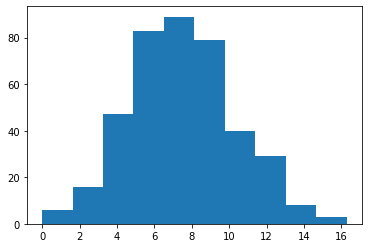

In [12]:
plt.hist('Sales',data=cmpny_data)
plt.show()

####  As the Sales distribution is following normal distribution we can divide the Sales distribution into three categories 'Low', 'Medium' and 'High'. Divide the Sales data using quartiles i.e. 0-25%, 25-75%, 75-100%.

In [13]:
# Including a column "Sal_cat" which is the Sales category dividing the sales into three categories
cmpny_data['Sales_cat'] = pd.cut(x = cmpny_data['Sales'], bins = [0,5.39,9.32,16.3], labels=['Low','Medium','High'], right = False)
cmpny_data.head()

,Sales,Comp_price,Income,Advertising,Population,Price,Shelve_loc,Avg_age,Education,Urban,US_loc,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [14]:
cmpny_data.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

### Step-2.4 : Exploring data using Visualisation

#### Differentiate Categorical and Numerical features

In [15]:
cmpny_data_cat = cmpny_data.select_dtypes(include=['object','category'])
cmpny_data_cat

,Shelve_loc,Urban,US_loc,Sales_cat
0,Bad,Yes,Yes,High
1,Good,Yes,Yes,High
2,Medium,Yes,Yes,High
3,Medium,Yes,Yes,Medium
4,Bad,Yes,No,Low
...,...,...,...,...
395,Good,Yes,Yes,High
396,Medium,No,Yes,Medium
397,Medium,Yes,Yes,Medium
398,Bad,Yes,Yes,Medium


In [16]:
cmpny_data_num = cmpny_data.select_dtypes(include=['int64','float64'])
cmpny_data_num

,Sales,Comp_price,Income,Advertising,Population,Price,Avg_age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14
396,6.14,139,23,3,37,120,55,11
397,7.41,162,26,12,368,159,40,18
398,5.94,100,79,7,284,95,50,12


#### Differentiate Discrete and Continuous features
+ Numerical variables are usually of 2 types 
+ Discrete features and continuous features

In [17]:
discrete_feature=[feature for feature in cmpny_data_num.columns if len(cmpny_data[feature].unique())<10]
discrete_feature

['Education']

In [18]:
continuous_feature=[feature for feature in cmpny_data_num.columns if feature not in discrete_feature]
continuous_feature

['Sales',
 'Comp_price',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Avg_age']

In [19]:
cmpny_data_cont = cmpny_data_num[continuous_feature]
cmpny_data_cont

,Sales,Comp_price,Income,Advertising,Population,Price,Avg_age
0,9.50,138,73,11,276,120,42
1,11.22,111,48,16,260,83,65
2,10.06,113,35,10,269,80,59
3,7.40,117,100,4,466,97,55
4,4.15,141,64,3,340,128,38
...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33
396,6.14,139,23,3,37,120,55
397,7.41,162,26,12,368,159,40
398,5.94,100,79,7,284,95,50


#### Univariate Analysis

#### Histogram

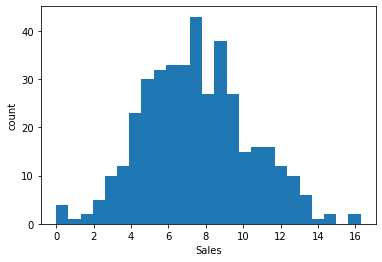

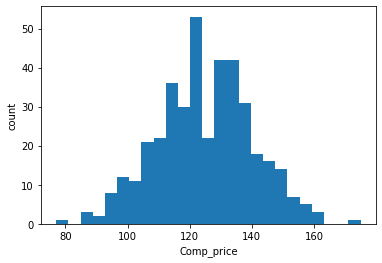

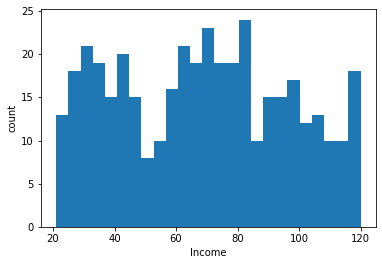

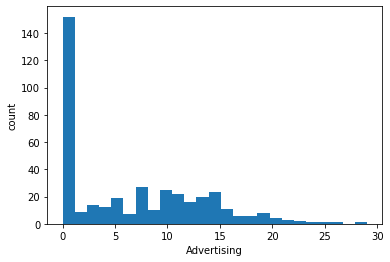

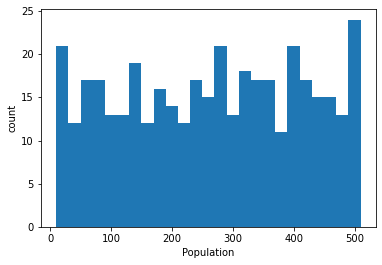

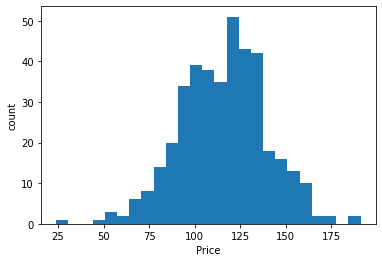

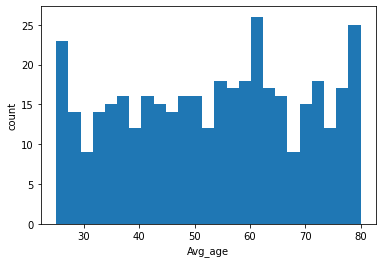

In [20]:
for feature in cmpny_data_cont.columns:
    plt.figure()
    plt.hist(cmpny_data_cont[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")

#### Boxplot

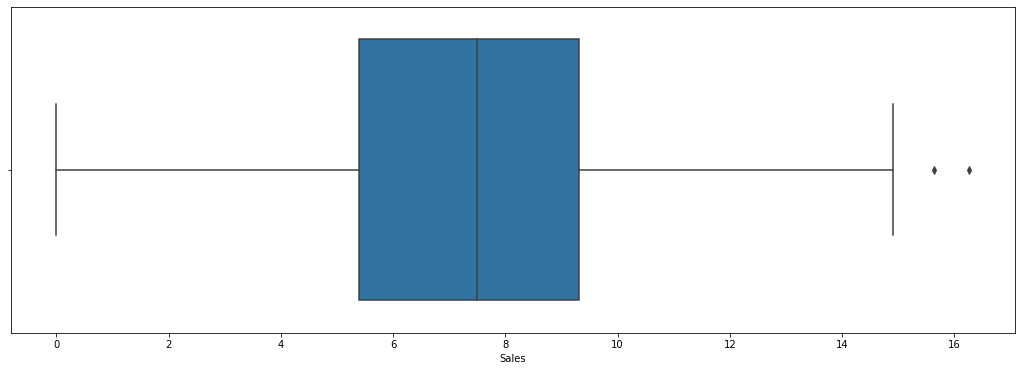

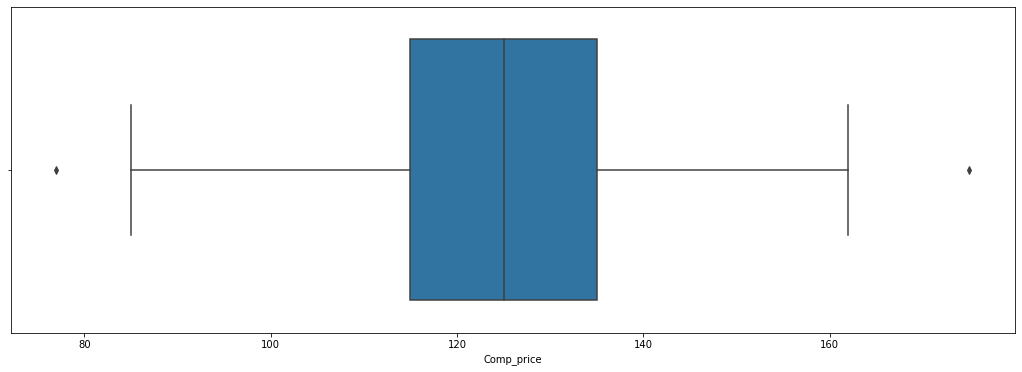

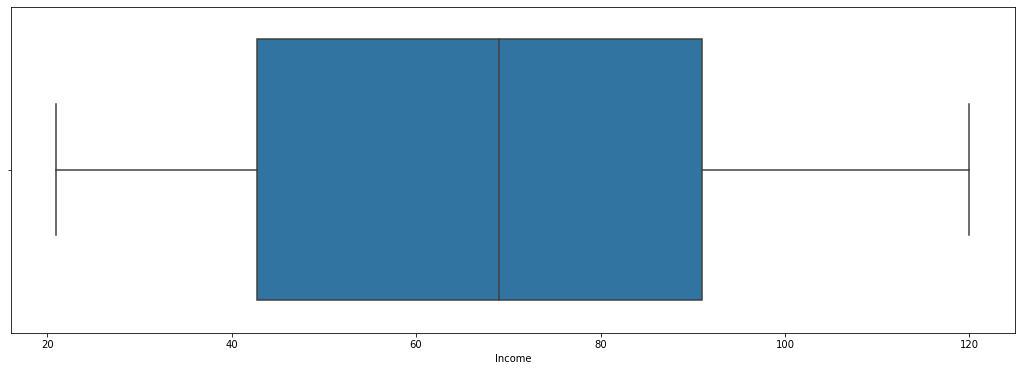

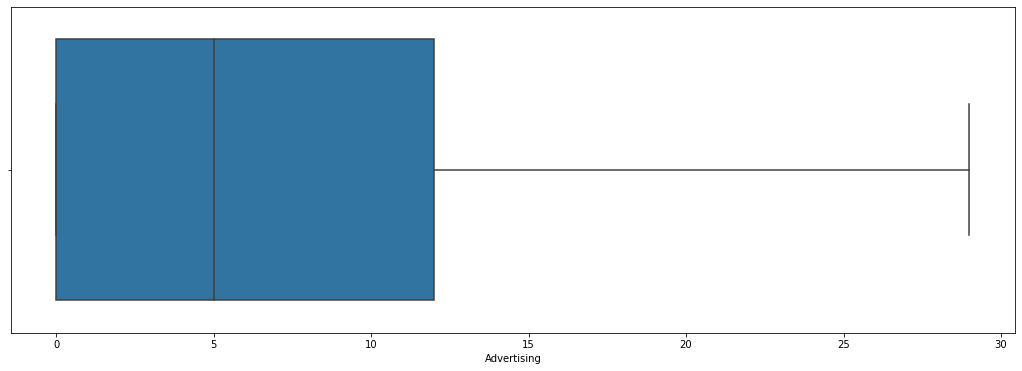

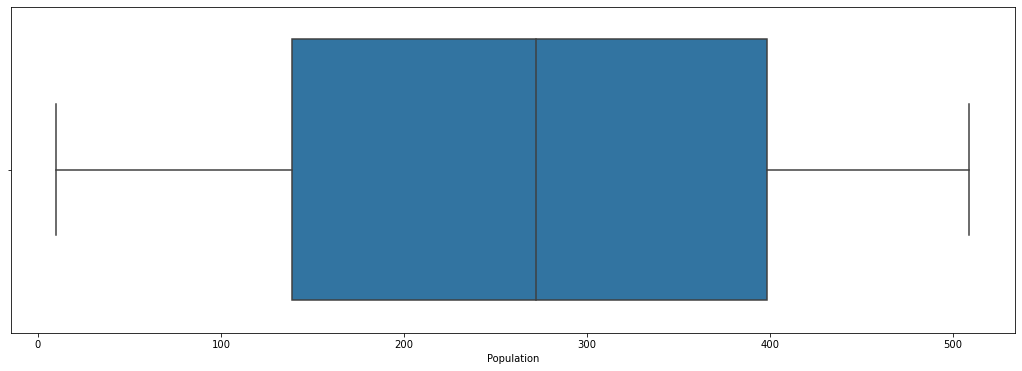

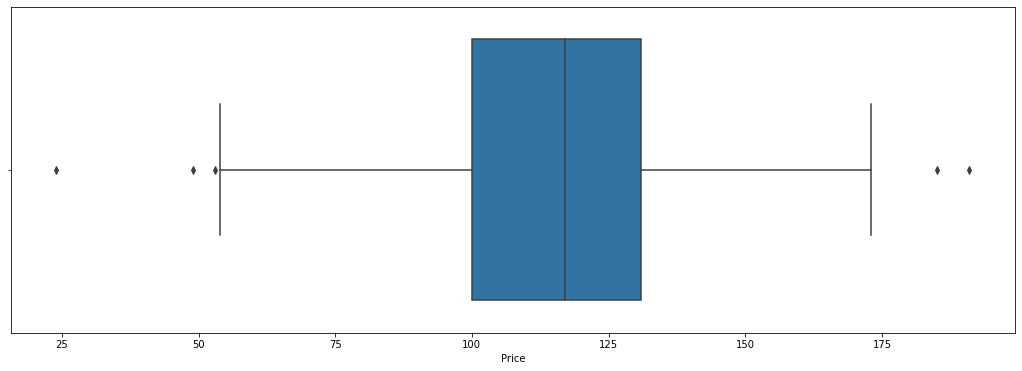

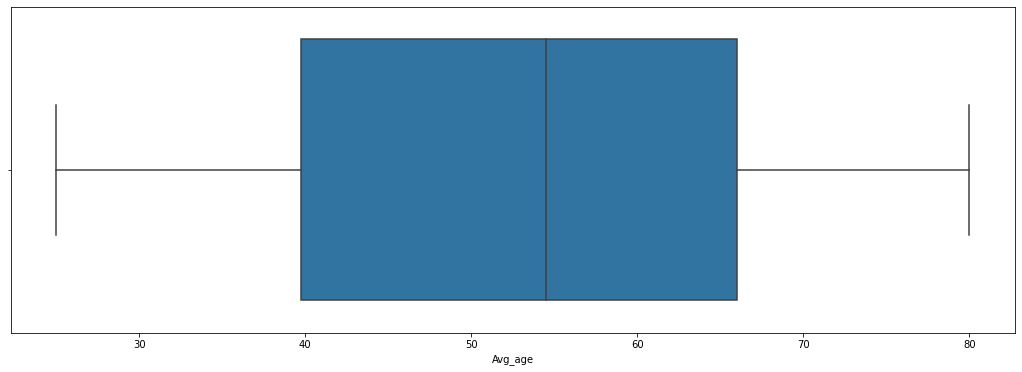

In [21]:
for feature in cmpny_data_cont.columns:
    plt.figure(figsize=(18,6))
    sb.boxplot(cmpny_data_cont[feature])

<AxesSubplot:>

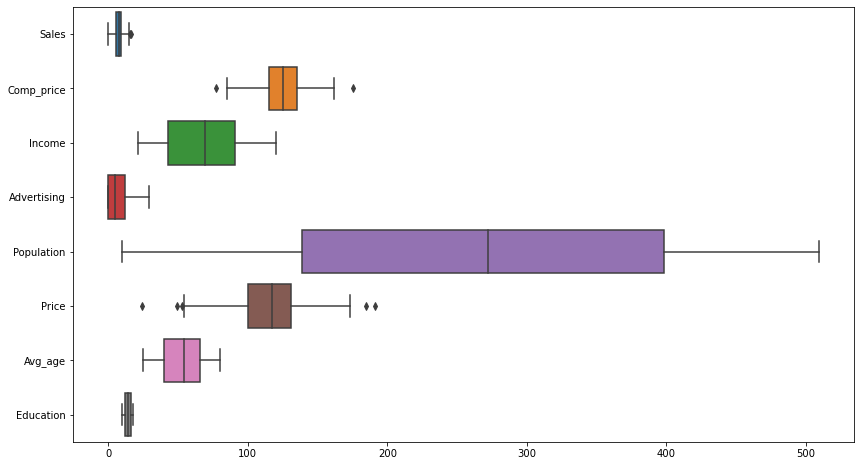

In [22]:
plt.figure(figsize=(14,8))
sb.boxplot(data=cmpny_data_num, orient='h')

#### Multivariate Analysis

#### Correlation and Heat map

In [23]:
# Checking for Correlation between variables
cmpny_data_cont.corr()

,Sales,Comp_price,Income,Advertising,Population,Price,Avg_age
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815
Comp_price,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177
Avg_age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000


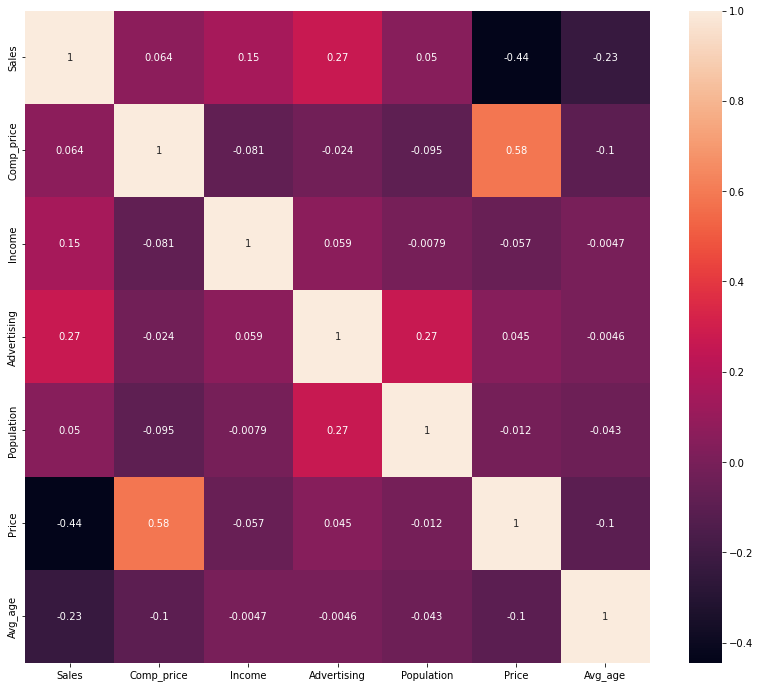

In [24]:
plt.figure(figsize=(14,12))
sb.heatmap(cmpny_data_cont.corr(),annot=True)
plt.show()

<Figure size 576x576 with 0 Axes>

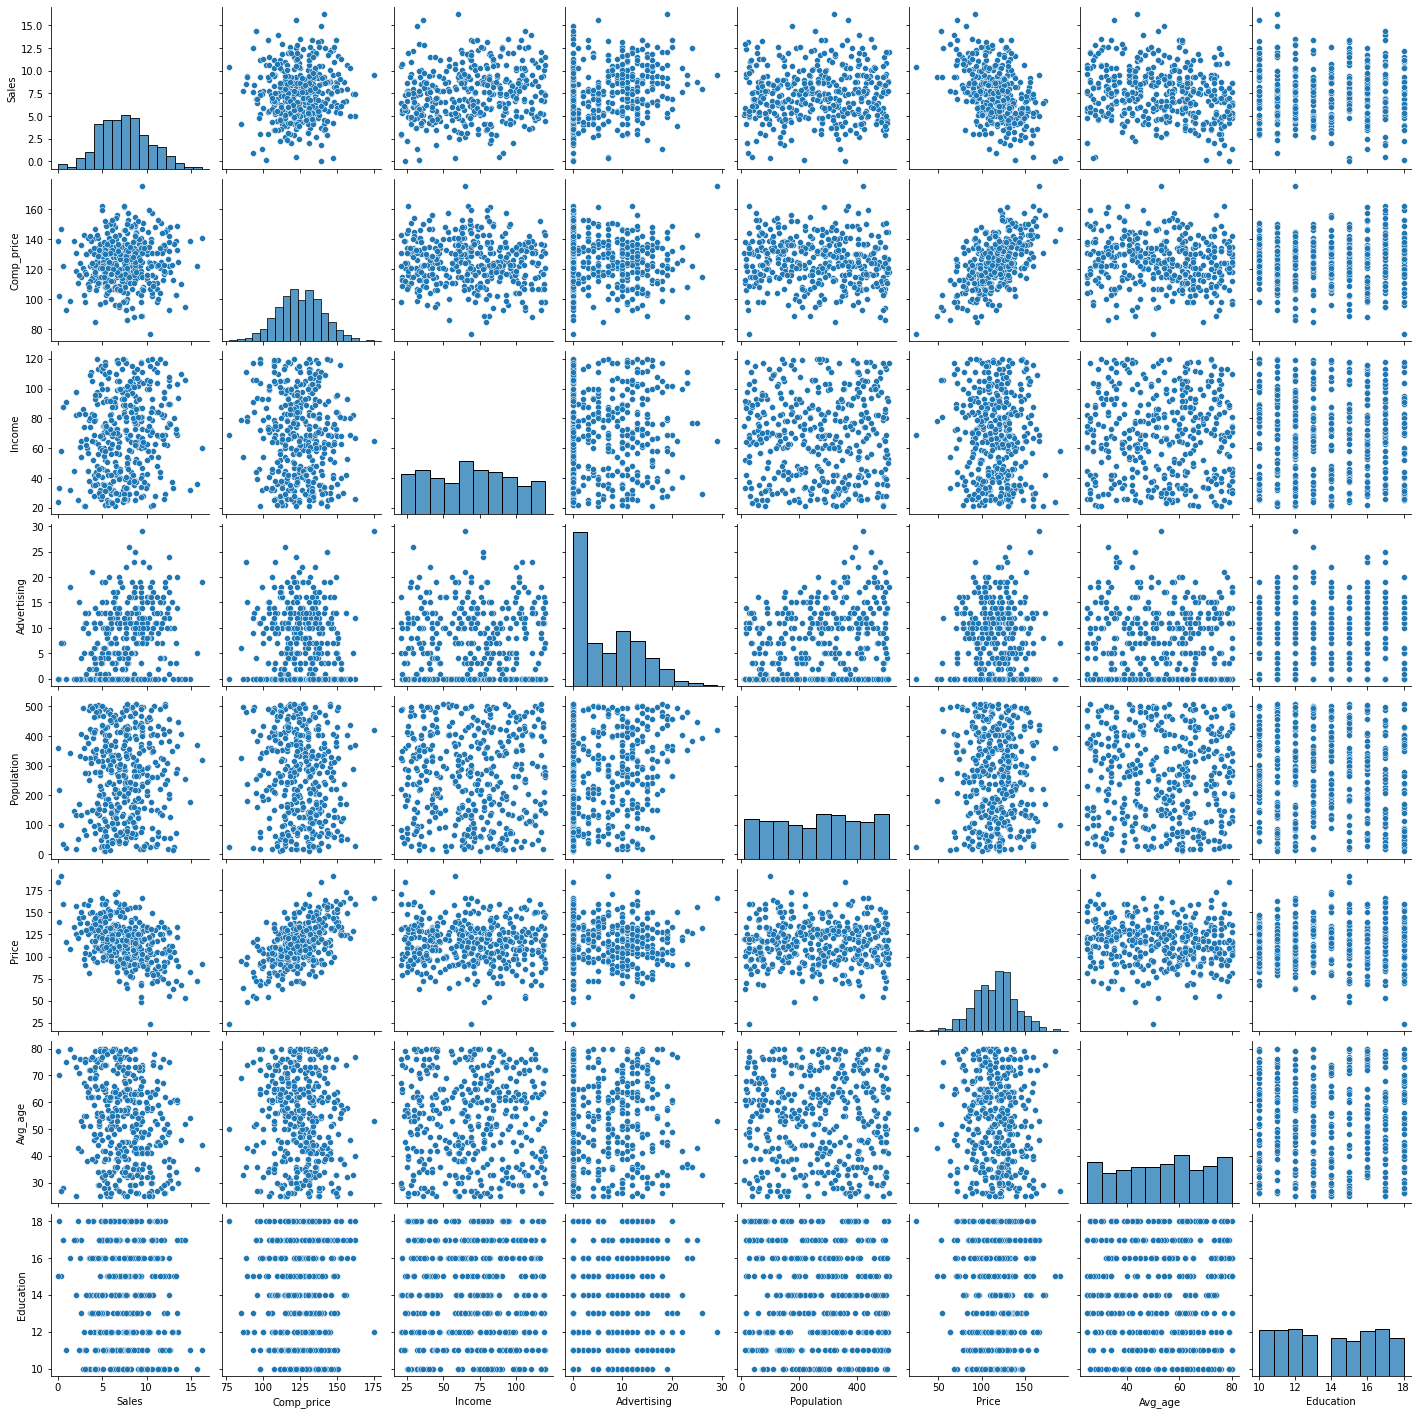

In [25]:
plt.figure(figsize=(8,8))
sb.pairplot(cmpny_data, palette='coolwarm')
plt.show()

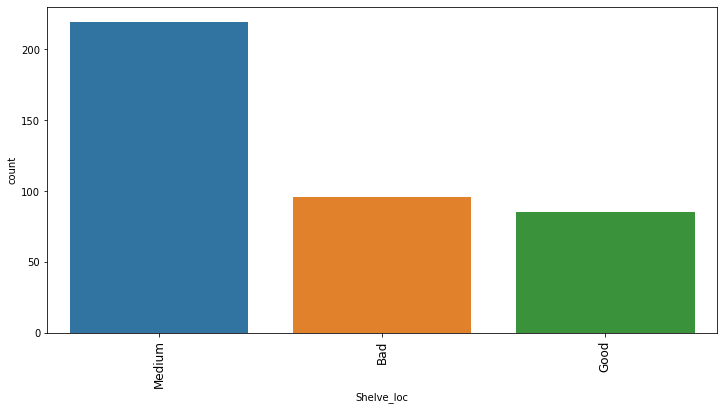

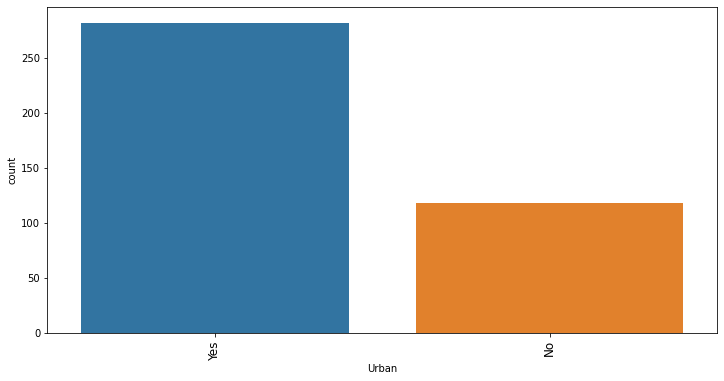

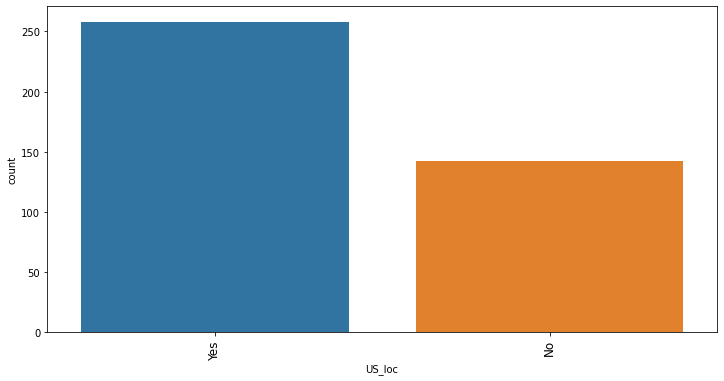

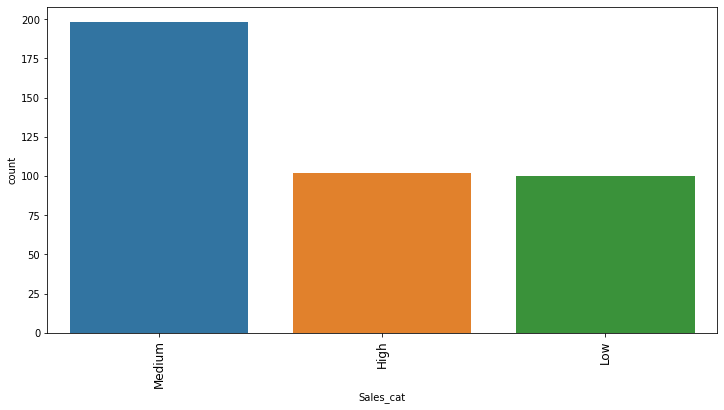

In [26]:
for i in cmpny_data_cat.columns:
    plt.figure(figsize=(12,6))
    sb.countplot(x=i, data=cmpny_data_cat, 
              order=cmpny_data_cat[i].value_counts().index)
    plt.xticks(rotation = 90,fontsize = 12)
plt.show()

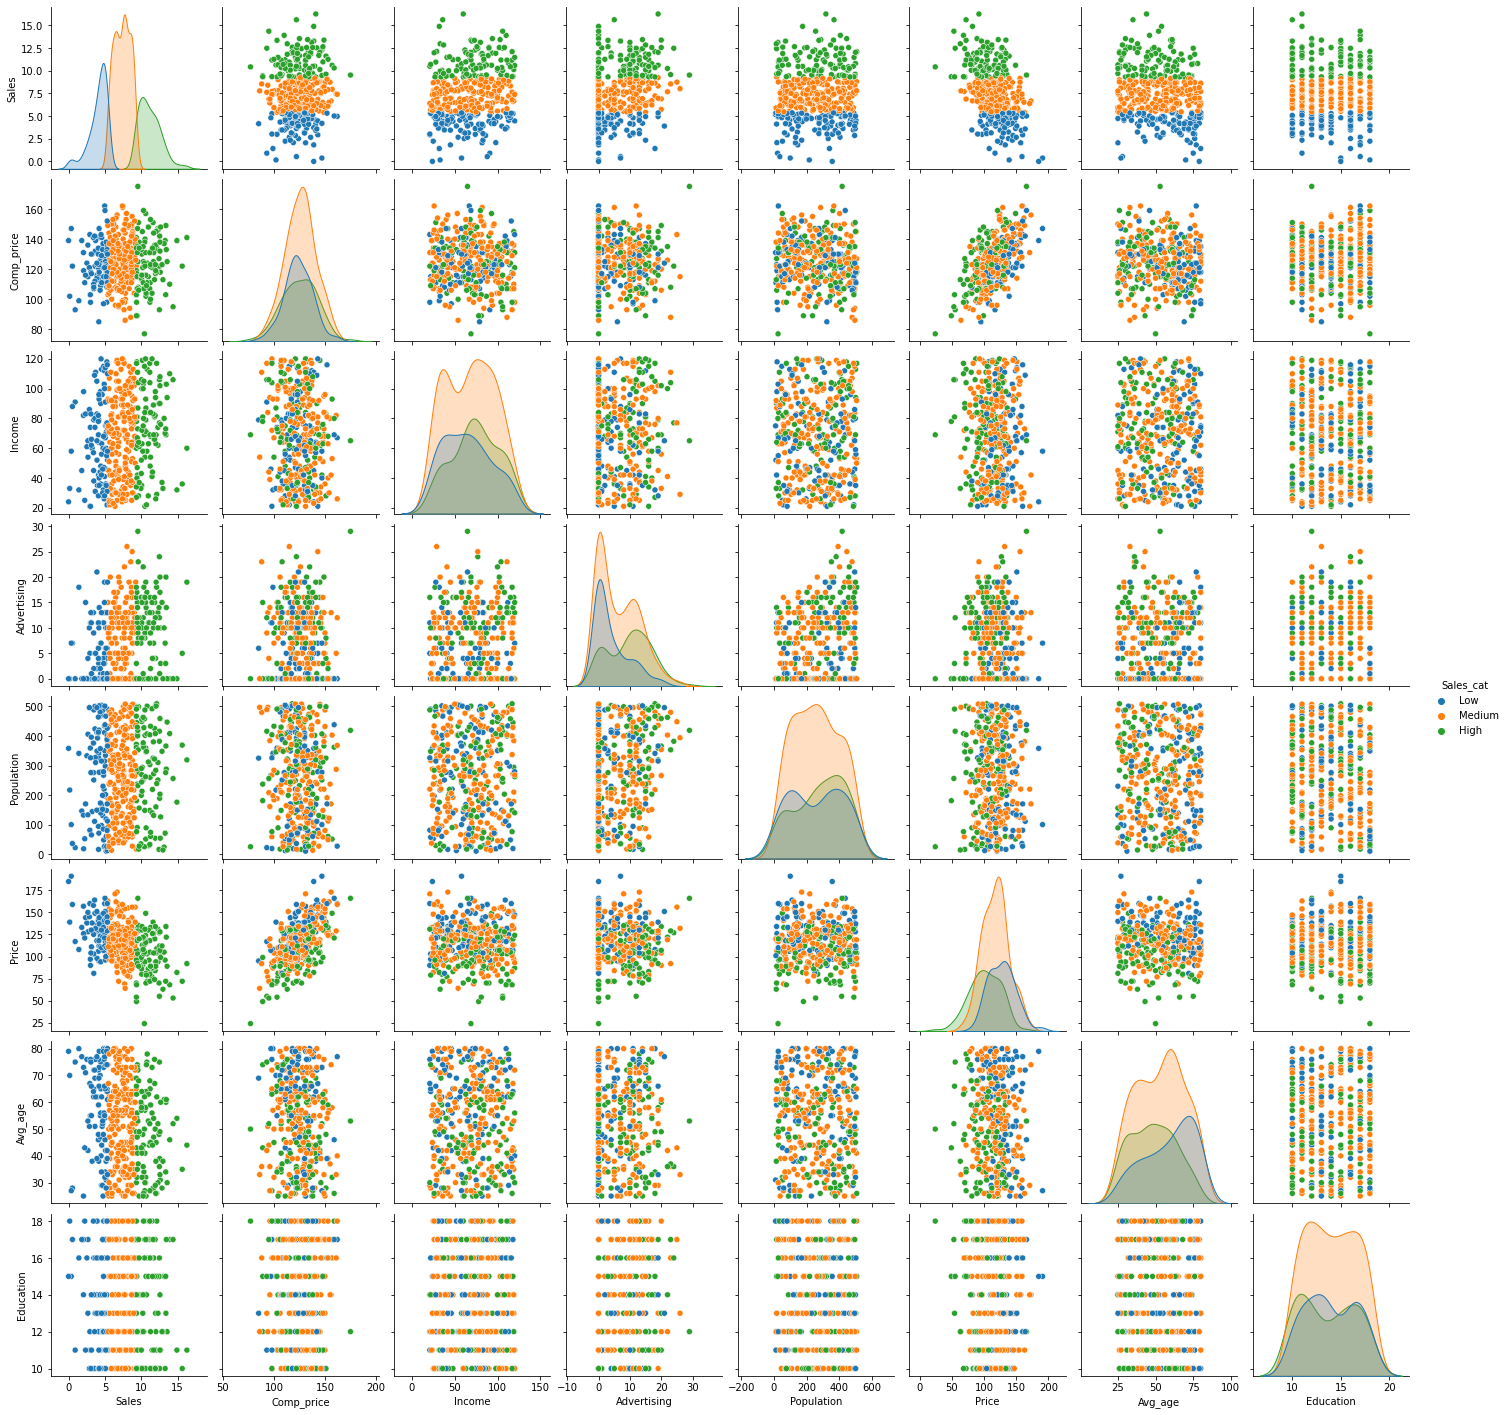

In [27]:
sb.pairplot(data=cmpny_data, hue = 'Sales_cat')

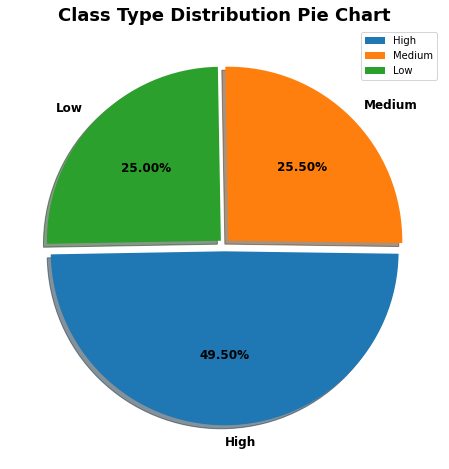

In [28]:
plt.figure(figsize = (12,8))
plt.pie(cmpny_data['Sales_cat'].value_counts(),
       labels=cmpny_data.Sales_cat.unique(),
       explode = [0.04,0.03,0.03],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Step-3 : Data Pre-Processing

#### Converting categorical variables into numerical using One-hot encoding

In [29]:
cmpny_data_mdf = cmpny_data.copy()
cmpny_data_mdf.drop('Sales',axis=1, inplace =True)
cmpny_data_mdf = pd.get_dummies(cmpny_data_mdf.iloc[:,:-1])
cmpny_data_mdf.head()

,Comp_price,Income,Advertising,Population,Price,Avg_age,Education,Shelve_loc_Bad,Shelve_loc_Good,Shelve_loc_Medium,Urban_No,Urban_Yes,US_loc_No,US_loc_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [30]:
cmpny_data_mdf['Sales_cat'] = cmpny_data.Sales_cat
cmpny_data_mdf.head()

,Comp_price,Income,Advertising,Population,Price,Avg_age,Education,Shelve_loc_Bad,Shelve_loc_Good,Shelve_loc_Medium,Urban_No,Urban_Yes,US_loc_No,US_loc_Yes,Sales_cat
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low


#### Converting categorical variables into numerical using Label encoder

In [31]:
le = LabelEncoder()
le.fit(cmpny_data["Sales_cat"])
cmpny_data_mdf["Sales_cat"]=le.transform(cmpny_data["Sales_cat"])
cmpny_data_mdf.head()

,Comp_price,Income,Advertising,Population,Price,Avg_age,Education,Shelve_loc_Bad,Shelve_loc_Good,Shelve_loc_Medium,Urban_No,Urban_Yes,US_loc_No,US_loc_Yes,Sales_cat
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


### Step-4 : Feature Selection

### Step-4.1 : Split the data into training and testing data

In [32]:
x = cmpny_data_mdf.drop('Sales_cat', 1)
y = cmpny_data_mdf['Sales_cat']

In [33]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

In [34]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [35]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
4,300.881058,Price
2,251.767458,Advertising
3,141.113336,Population
5,106.577639,Avg_age
8,66.174919,Shelve_loc_Good
1,65.145403,Income
7,48.524460,Shelve_loc_Bad
12,13.109136,US_loc_No
9,8.654770,Shelve_loc_Medium
13,7.215106,US_loc_Yes


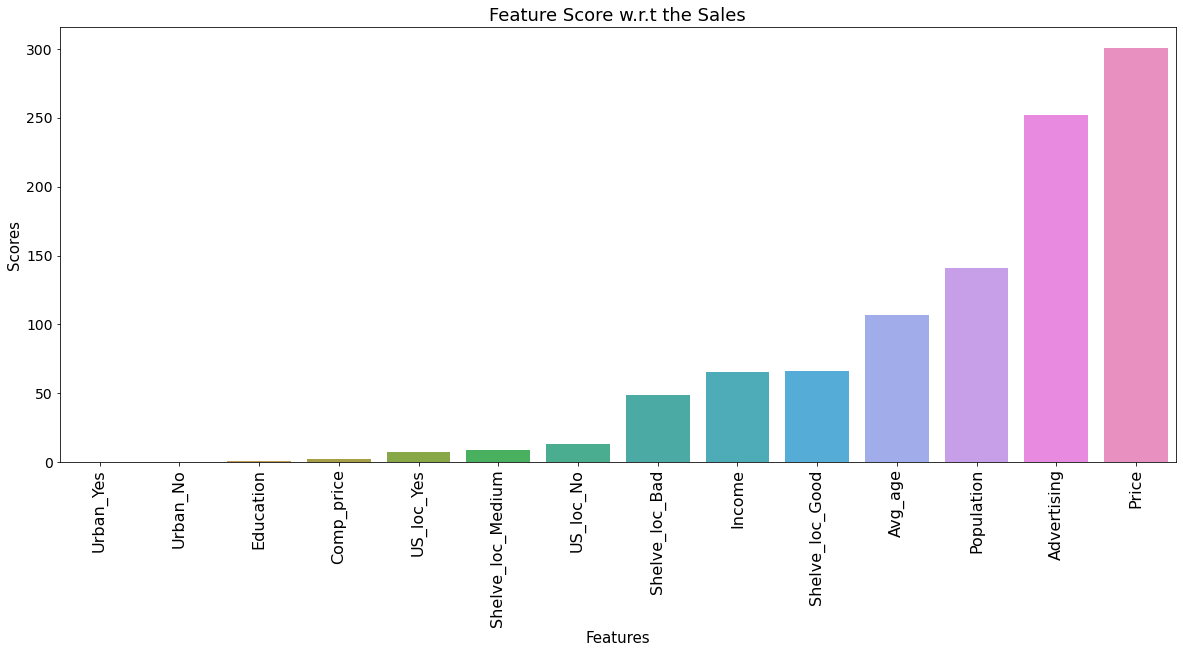

In [36]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sb.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [37]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)


classifier_rf.fit(x, y)

# checking the oob score
print('checking the oob score',classifier_rf.oob_score_)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x, y)

print('Best Score',grid_search.best_score_)

rf_best = grid_search.best_estimator_
print(rf_best)

checking the oob score 0.635
Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best Score 0.66
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)


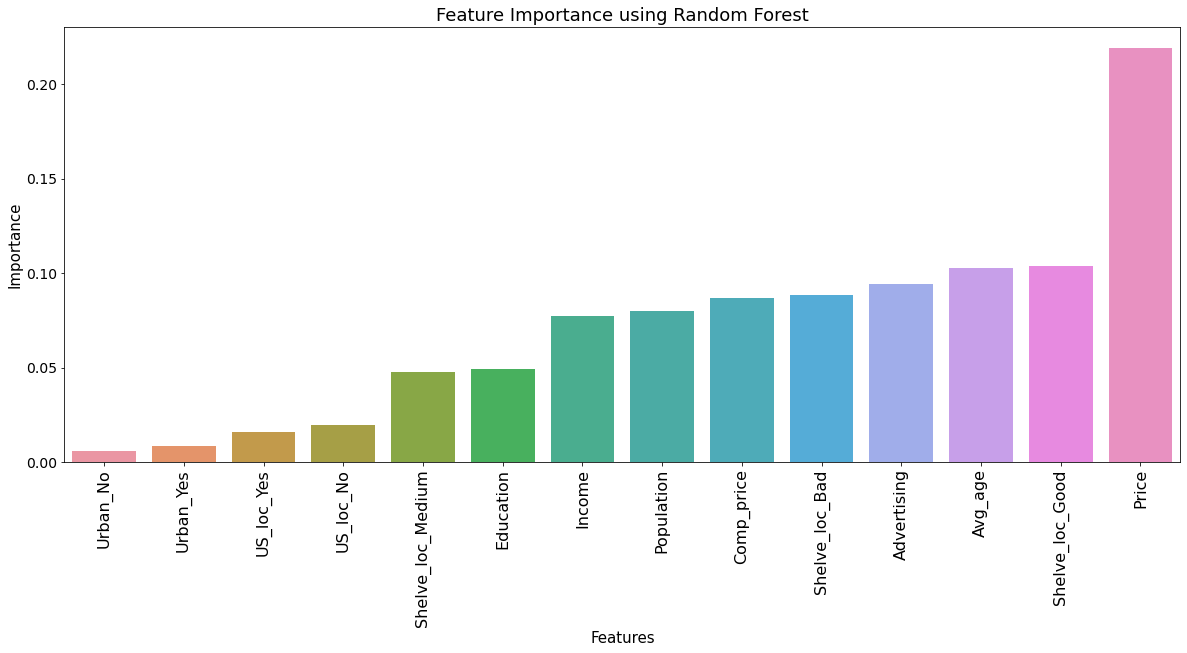

In [38]:
rf_best.feature_importances_
imp_df = pd.DataFrame({
    "Feature": x.columns,
    "Importance": rf_best.feature_importances_
})

plt.figure(figsize=(20,8))
# make barplot and sort bars
sb.barplot(x='Feature',
            y="Importance", 
            data=imp_df, 
            order=imp_df.sort_values('Importance').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Importance using Random Forest", size=18)
plt.show()

In [39]:
model_data = cmpny_data_mdf[['Price', 'Advertising','Population', 'Income', 'Avg_age', 'Shelve_loc_Good', 'Shelve_loc_Bad','Sales_cat']]
model_data.head()

,Price,Advertising,Population,Income,Avg_age,Shelve_loc_Good,Shelve_loc_Bad,Sales_cat
0,120,11,276,73,42,0,1,0
1,83,16,260,48,65,1,0,0
2,80,10,269,35,59,0,0,0
3,97,4,466,100,55,0,0,2
4,128,3,340,64,38,0,1,1


In [40]:
x = model_data.drop('Sales_cat',axis=1)
y = model_data['Sales_cat']

In [41]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 178, 0: 92, 1: 90}) Testing Data Counter({2: 20, 1: 10, 0: 10})


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [43]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 7)
Shape of X_test:  (120, 7)
Shape of y_train:  (280,)
Shape of y_test (120,)


### Step-5 : Build a Random Forest model

### Step-5.1 : Grid search using Stratified Kfold Splits on Imbalanced Dataset

In [44]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [45]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    92.0  90.0  178.0       1.0      360.0         360.0
_______________________________________________
Confusion Matrix: 
 [[ 92   0   0]
 [  0  90   0]
 [  0   0 178]]

Test Result:
Accuracy Score: 60.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy  macro avg  weighted avg
precision   0.875000   0.375000   0.583333       0.6   0.611111      0.604167
recall      0.700000   0.300000   0.700000       0.6   0.566667      0.600000
f1-score    0.777778   0.333333   0.636364       0.6   0.582492      0.595960
support    10.000000  10.000000  20.0

### Step-5.2 : Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset

In [46]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    72.0  74.0  134.0       1.0      280.0         280.0
_______________________________________________
Confusion Matrix: 
 [[ 72   0   0]
 [  0  74   0]
 [  0   0 134]]

Test Result:
Accuracy Score: 69.17%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.687500   0.684211   0.695652  0.691667    0.689121      0.691135
recall      0.733333   0.500000   0.750000  0.691667    0.661111      0.691667
f1-score    0.709677   0.577778   0.721805  0.691667    0.669753      0.687567
support    30.000000  26.000000  

#### Observation: 
+ In both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

### Step-6 : Handling imbalance data using SMOTE based techniques

In [47]:
x = model_data.drop(['Sales_cat'], axis=1)
y = model_data['Sales_cat']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42,stratify=y)

In [48]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 7)
Shape of X_test:  (120, 7)
Shape of y_train:  (280,)
Shape of y_test (120,)


### Step-6.1 : SMOTE Oversampling technique

In [49]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({2: 139, 0: 139, 1: 139})


### Step-6.2 : ADASYN: Adaptive Synthetic Sampling Approach

In [50]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=42)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({0: 141, 1: 140, 2: 139})


### Step-6.3 : Hybridization: SMOTE + Tomek Links

In [51]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=42)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({0: 128, 1: 128, 2: 123})


### Step-6.4 : Hybridization: SMOTE + ENN

In [52]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({1: 56, 0: 45, 2: 6})


### Step-6.5 : Performance Analysis after Resampling

In [53]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [54]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    #print('AUC-ROC')
    #print('='*60)
    #print(roc_auc_score(y_test, y_prob[:,1], multi_class='ovo'))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

In [55]:
model_params = {

    'random-forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
             "n_estimators": [5, 10, 15, 20, 25], 
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']

         }
    }
}

In [56]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with ACTUAL
Confusion Matrix
[[18  0 13]
 [ 0 13 17]
 [ 7  9 43]] 

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.58      0.64        31
           1       0.59      0.43      0.50        30
           2       0.59      0.73      0.65        59

    accuracy                           0.62       120
   macro avg       0.63      0.58      0.60       120
weighted avg       0.62      0.62      0.61       120
 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with SMOTE
Confusion Matrix
[[23  0  8]
 [ 1 22  7]
 [ 5 18 36]] 

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.74      0.77        31
           1       0.55      0.73      0.63        30
           2       0.71      0.61      0.65        59

    accuracy                           0.68       120
   macro avg    

#### As per the above results, we can observe that ADASYN technique gave the best results. Hence use this.

In [57]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=42)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({0: 141, 1: 140, 2: 139})


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_train_ada,y_train_ada,test_size=0.3,random_state=42, stratify=y_train_ada)

counter = Counter(y_train_ada)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({0: 141, 1: 140, 2: 139})
After Counter({0: 99, 1: 98, 2: 97})
Shape of X_train:  (294, 7)
Shape of X_test:  (126, 7)
Shape of y_train:  (294,)
Shape of y_test (126,)


### Step-7 : Random Forest

### Step-7.1 : Random Forest hyperparameter tuning

In [59]:
#base model
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 42) 
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

In [60]:
loc = np.array(score_array).max()
score_array.index(loc)+1

32

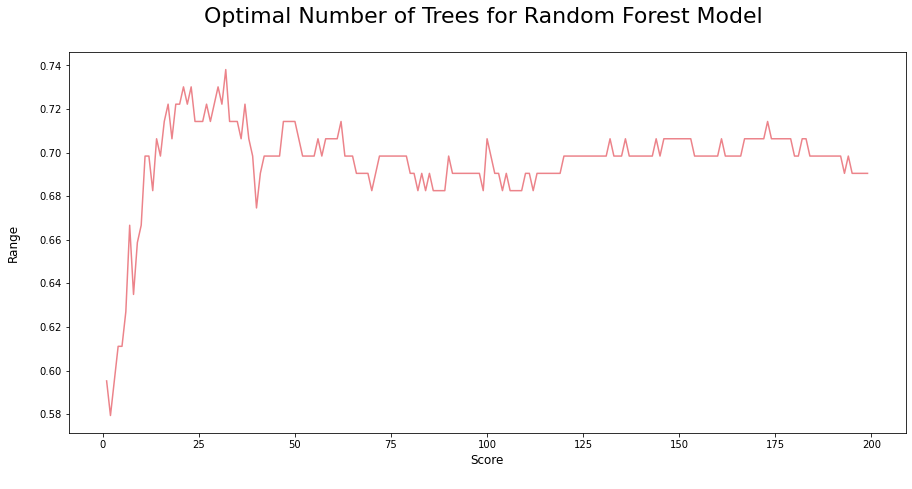

In [61]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,200),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

#### a) Randomized Search Cross Validation<a class="anchor" id="a"></a> 

In [62]:
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 195, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True})
Train Result:
Accuracy Score: 90.48%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.912621   0.903846   0.896552  0.904762    0.904340      0.904394
recall      0.949495   0.959184   0.804124  0.904762    0.904267      0.904762
f1-score    0.930693   0.930693   0.847826  0.904762    0.903071      0.903353
support    99.000000  98.000000  97.000000  0.904762  294.000000    294.000000
_______________________________________________
Confusion Matrix: 
 [[94  0  5]
 [ 0 94  4]
 [ 9 10 78]]

Test Result:
Accuracy Score: 68.25%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted 

### 7.2 Visualizing one of the decision tree in random forest 

In [63]:
rf_best = rf_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, max_features='auto', min_samples_leaf=4,
                       n_estimators=195, random_state=42)

In [64]:
cmpny_data.Sales_cat.unique()

['High', 'Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

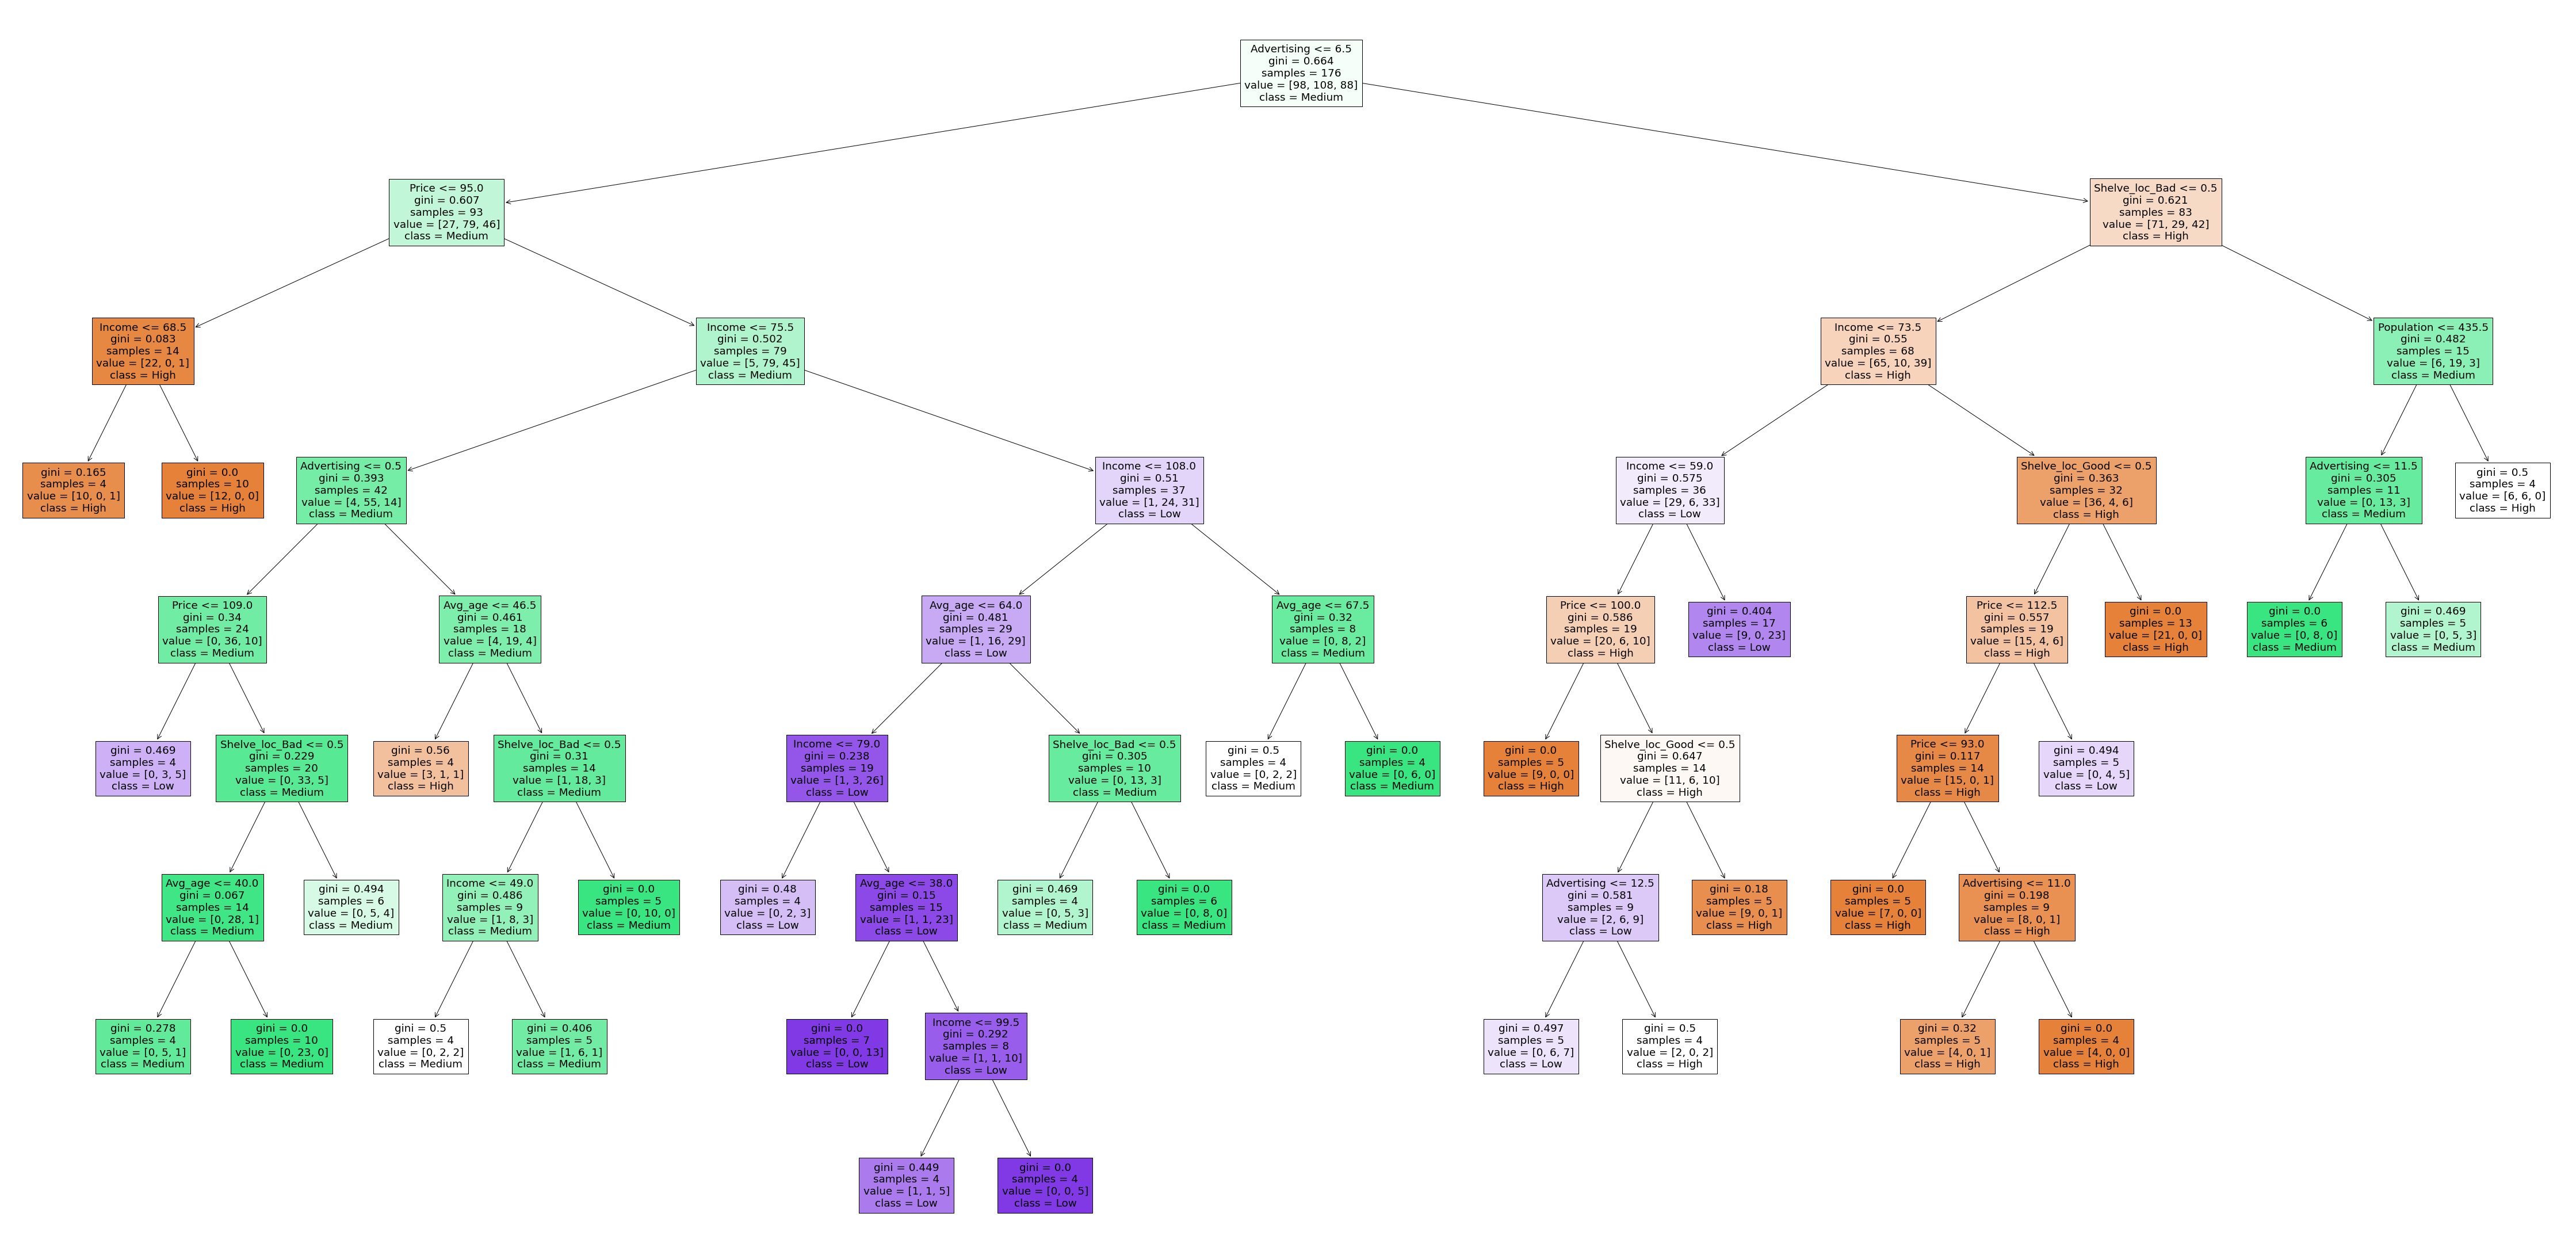

In [67]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[190], feature_names = model_data.columns,
          class_names=cmpny_data.Sales_cat.unique(),filled=True)
plt.show()